In [1]:
from scipy.io import readsav
import matplotlib.pyplot as plt 
from matplotlib import dates, colors
from sunpy.time import parse_time
import numpy as np 
import pandas as pd

In [2]:
out_data = readsav("out_spec.sav")["out"]

In [3]:
out_data.dtype.names

('STIX_DATA',
 'STIX_TIME',
 'FERMI_TIME_EDGES',
 'FERMI_MID_TIMES_ARR',
 'FERMI_DATA_AS_STIX',
 'PHOTON_ENERGY',
 'STIX_DATA_OVER_INT_ARR',
 'STIX_DATA_ERR_OVER_INT_ARR',
 'RESAMPLED_STIX_ARR',
 'RESAMPLED_STIX_ERR_ARR',
 'STIX_DRM_EEDGES',
 'STIX_CT_ENERGY_BINS',
 'FIT_PARAMS',
 'FIT_PARAM_SIGMAS')

In [4]:
stix_data = out_data["STIX_DATA"][0]["data"][0]
stix_data_err = out_data["STIX_DATA"][0]["edata"][0]
stix_time = out_data["STIX_TIME"][0]
stix_drm_energy = out_data["STIX_DRM_EEDGES"][0] # energy edges
stix_ct_energy = out_data["STIX_CT_ENERGY_BINS"][0] # mid energies  

fermi_time_egdes = out_data["fermi_time_edges"][0]
fermi_time_mid = out_data["FERMI_MID_TIMES_ARR"][0]
fermi_photon_energy = out_data["photon_energy"][0]
fermi_data_as_stix = out_data["fermi_data_as_stix"][0]

stix_data_over_int = out_data["STIX_DATA_OVER_INT_ARR"][0]
stix_data_err_over_int = out_data["STIX_DATA_ERR_OVER_INT_ARR"][0]

resampled_stix = out_data["resampled_stix_arr"][0]
resampled_stix_err = out_data["resampled_stix_err_arr"][0]

fit_params = out_data["fit_params"][0]
fit_param_sigmas = out_data["fit_param_sigmas"][0]

In [5]:
print("Shapes of data arrays: \n", 
      "STIX data:",  stix_data.shape, "\n",
      "STIX data error", stix_data_err.shape, "\n",
      "STIX energy:",  stix_ct_energy.shape, "\n",
      "STIX drm energy:",  stix_drm_energy.shape, "\n",
      "FERMI time edges:",  fermi_time_egdes.shape, "\n",
      "FERMI time mid:",  fermi_time_mid.shape, "\n",
      "FERMI time edges:",  fermi_time_egdes.shape, "\n",
      "FERMI data as STIX", fermi_data_as_stix.shape, "\n",
      "STIX data over time interval", stix_data_over_int.shape, "\n",
      "STIX data error over time interval", stix_data_err_over_int.shape, "\n",
      "Resampled STIX to FERMI times", resampled_stix.shape, "\n",
      "Resampled STIX error to FERMI times", resampled_stix_err.shape, "\n",
      "fit params", fit_params.shape, "\n",
      "fit param errors", fit_param_sigmas.shape, "\n",
     )

Shapes of data arrays: 
 STIX data: (5687, 22) 
 STIX data error (5687, 22) 
 STIX energy: (22,) 
 STIX drm energy: (22, 2) 
 FERMI time edges: (92, 2) 
 FERMI time mid: (92,) 
 FERMI time edges: (92, 2) 
 FERMI data as STIX (92, 22) 
 STIX data over time interval (717, 22) 
 STIX data error over time interval (717, 22) 
 Resampled STIX to FERMI times (92, 22) 
 Resampled STIX error to FERMI times (92, 22) 
 fit params (92, 3) 
 fit param errors (92, 3) 



## Compare resampled data

In [6]:
fermi_time_egdes[0][1] - fermi_time_egdes[0][0]

4.0960001945495605

In [7]:
new_stix = np.where((stix_time>fermi_time_egdes[0][0]) & (stix_time<fermi_time_egdes[-1][1]))

In [8]:
stix_data.shape

(5687, 22)

In [9]:
new_stix_data = stix_data[new_stix, :][0]
new_stix_time = stix_time[new_stix]
new_stix_time_dt = parse_time(new_stix_time, format="utime").datetime
new_stix_err = stix_data_err[new_stix, :][0]

In [10]:
new_stix_data.shape

(717, 22)

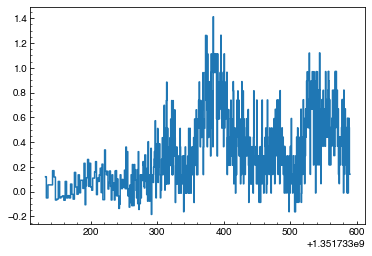

In [11]:
plt.plot(new_stix_time, new_stix_data[:, 15], drawstyle="steps-mid")

## Plot some of the data

In [12]:
fermi_time_dt = parse_time(fermi_time_mid, format="utime").datetime

Text(0.5, 1.0, 'Single power law fit to data 18-60 keV')

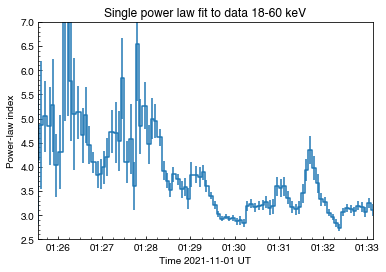

In [13]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
plt.errorbar(fermi_time_dt, 
             fit_params[:, 1], fit_param_sigmas[:, 1], 
             drawstyle="steps-mid")

ax.set_ylim(2.5, 7)
ax.set_xlim(fermi_time_dt[0], 
            fermi_time_dt[-1])

ax.set_ylabel("Power-law index")
ax.set_xlabel("Time {:s} UT".format(fermi_time_dt[0].strftime("%Y-%m-%d")))
ax.set_title("Single power law fit to data 18-60 keV")

In [14]:
stix_data_over_int.shape

(717, 22)

In [15]:
stix_time.shape

(5687,)

In [16]:
stix_time_dt = parse_time(stix_time, format="utime").datetime
stix_time_int = stix_time[np.where((stix_time>fermi_time_egdes[0, 0])&(stix_time<fermi_time_egdes[-1, 1]))]
stix_time_int_dt = parse_time(stix_time_int, format="utime").datetime


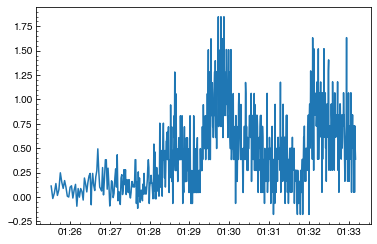

In [17]:
fig, ax = plt.subplots()
ax.plot(stix_time_int_dt, stix_data_over_int[:, 14])
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))

In [18]:
stix_data_over_int.shape

(717, 22)

In [19]:
resampled_stix_err.shape

(92, 22)

In [20]:
def sum_data(data_arr, index_arr, err_array=None, ebins=[4, 10, 20, 28, 50, 84]):
    summed_data = []
    summed_err = []
    cols = []
    for i in range(len(ebins)-1):
        #print("{:d}-{:d}keV".format(ebins[i], ebins[i+1]))
        cols.append("{:d}-{:d}keV".format(ebins[i], ebins[i+1]))
        e_ints = (np.where((stix_drm_energy[:, 0]>=ebins[i])&(stix_drm_energy[:, 1]<=ebins[i+1]))[0])
        #print(len(e_ints))
        summed_data.append(np.sum(data_arr[:, e_ints], axis=1))
        if err_array is not None:
            err = np.sqrt(np.sum((err_array[:, e_ints])**2, axis=1))
            summed_err.append(err)
        
        
    summed_data = np.array(summed_data)
    
    
    summed_data_df = pd.DataFrame(summed_data.T, index=index_arr, 
                                  columns=cols)

    if err_array is not None:
        summed_err = np.array(summed_err)
        summed_data_err_df = pd.DataFrame(summed_err.T, index=index_arr, 
                                      columns=cols)
    else: 
        summed_data_err_df = None
        
    return summed_data_df, summed_data_err_df

In [21]:
summed_data_stix, summed_data_err_stix = sum_data(stix_data, stix_time_dt, err_array=stix_data_err)
summed_data_stix_int, summed_data_err_stix_int = sum_data(new_stix_data, new_stix_time_dt, err_array=new_stix_err)
summed_data_resample, summed_data_err_resample = sum_data(resampled_stix, parse_time(fermi_time_mid, format="utime").datetime, 
                                                          err_array=resampled_stix_err)
summed_data_fermi, summed_data_err_fermi = sum_data(fermi_data_as_stix, parse_time(fermi_time_mid, format="utime").datetime)

In [22]:
summed_data_resample.keys()

Index(['4-10keV', '10-20keV', '20-28keV', '28-50keV', '50-84keV'], dtype='object')

(<ErrorbarContainer object of 3 artists>,)

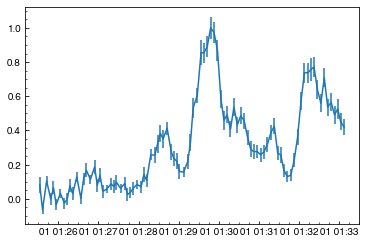

In [23]:
plt.errorbar(summed_data_resample.index, summed_data_resample["20-28keV"]/summed_data_resample["20-28keV"].max(),
             summed_data_err_resample["20-28keV"]/summed_data_resample["20-28keV"].max()), 

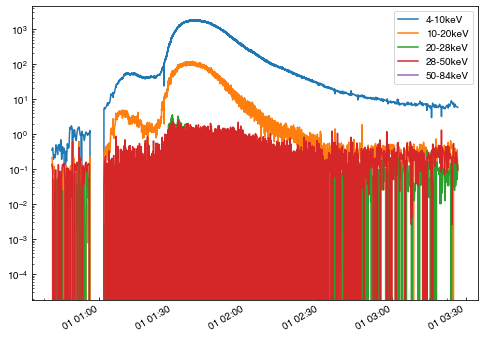

In [24]:
# summed_data_stix = summed_data_stix.resample("4s").mean()
# summed_data_stix[summed_data_stix<0] = 0
# summed_data_stix.replace(0, np.nan, inplace=True)

fig, ax = plt.subplots(figsize=(8, 6))
summed_data_stix.plot(ax=ax)
ax.legend()
ax.set_yscale("log")

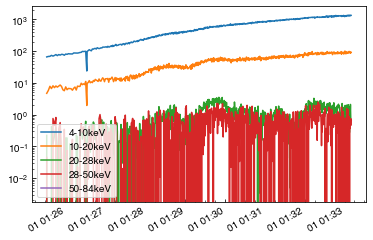

In [25]:
summed_data_stix_int.plot()
plt.yscale("log")

In [26]:
stix_data_over_int.shape

(717, 22)

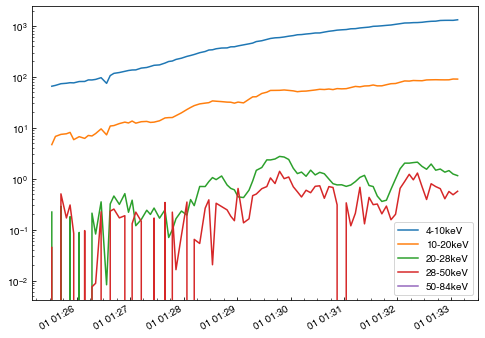

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
summed_data_resample.plot(ax=ax)
ax.legend()
ax.set_yscale("log")

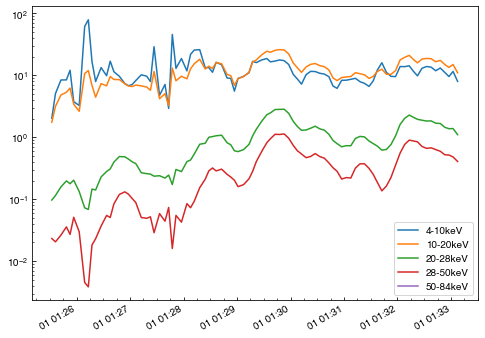

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
summed_data_fermi.plot(ax=ax)
ax.legend()
ax.set_yscale("log")

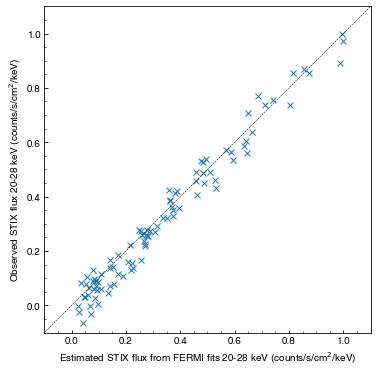

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(summed_data_fermi["20-28keV"]/summed_data_fermi["20-28keV"].max(), 
        summed_data_resample["20-28keV"]/summed_data_resample["20-28keV"].max(), 
        marker='x', ls='')
plt.plot([-0.1, 1.1], [-0.1, 1.1], color='k', ls='dashed', lw=0.5)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel("Estimated STIX flux from FERMI fits 20-28 keV (counts/s/cm$^2$/keV)")
ax.set_ylabel("Observed STIX flux 20-28 keV (counts/s/cm$^2$/keV)")
ax.set_aspect('equal', adjustable='box')
plt.savefig("comparison_plot_2028keV.png")

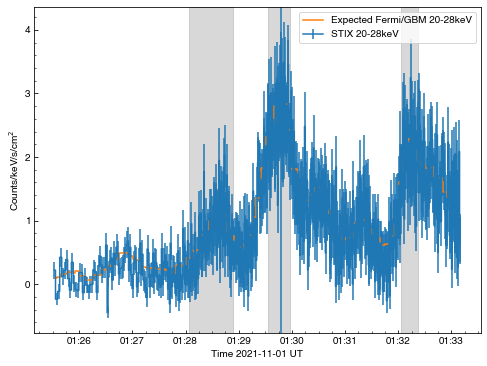

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(summed_data_stix_int.index, summed_data_stix_int["20-28keV"], 
             summed_data_err_stix_int["20-28keV"], label="STIX 20-28keV", drawstyle="steps-mid")
plt.plot(summed_data_fermi["20-28keV"], label="Expected Fermi/GBM 20-28keV", drawstyle="steps-mid")

ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
#ax.set_yscale("log")
ax.legend()
ax.set_ylabel("Counts/keV/s/cm$^2$")
ax.set_xlabel("Time {:s} UT".format(summed_data_fermi.index[0].strftime("%Y-%m-%d")))
plt.axvline(summed_data_fermi.index[51])


plt.axvspan(summed_data_fermi.index[30], summed_data_fermi.index[40], alpha=0.3, color='grey')
plt.axvspan(summed_data_fermi.index[48], summed_data_fermi.index[53], alpha=0.3, color='grey')
plt.axvspan(summed_data_fermi.index[78], summed_data_fermi.index[82], alpha=0.3, color='grey')

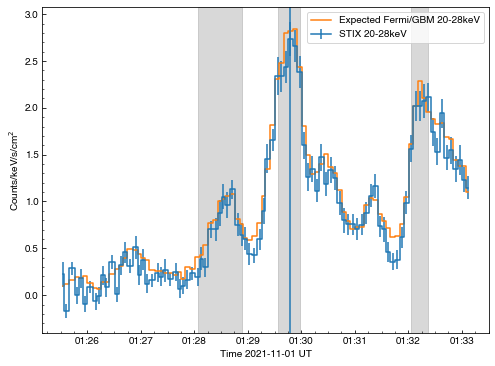

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(summed_data_resample.index, summed_data_resample["20-28keV"], 
             summed_data_err_resample["20-28keV"], label="STIX 20-28keV", drawstyle="steps-mid")
plt.plot(summed_data_fermi["20-28keV"], label="Expected Fermi/GBM 20-28keV", drawstyle="steps-mid")

ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
#ax.set_yscale("log")
ax.legend()
ax.set_ylabel("Counts/keV/s/cm$^2$")
ax.set_xlabel("Time {:s} UT".format(summed_data_fermi.index[0].strftime("%Y-%m-%d")))
plt.axvline(summed_data_fermi.index[51])


plt.axvspan(summed_data_fermi.index[30], summed_data_fermi.index[40], alpha=0.3, color='grey')
plt.axvspan(summed_data_fermi.index[48], summed_data_fermi.index[53], alpha=0.3, color='grey')
plt.axvspan(summed_data_fermi.index[78], summed_data_fermi.index[82], alpha=0.3, color='grey')

## Plot directivity case

In [32]:
erange = np.where((stix_ct_energy>=18)&(stix_ct_energy<=60))[0]
erange.shape


(9,)

In [33]:
new_stix_data.shape

(717, 22)

In [34]:
fermi_data_as_stix.shape

(92, 22)

In [35]:
inds_match = np.where((new_stix_time>=fermi_time_egdes[48][0])&(new_stix_time<=fermi_time_egdes[52][1]))
inds_match

(array([280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
        293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
        306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
        319, 320, 321, 322, 323, 324, 325, 326, 327]),)

In [36]:
new_stix_time_dt[inds_match[0][0]], new_stix_time_dt[inds_match[0][-1]]

(datetime.datetime(2021, 11, 1, 1, 29, 31, 924000),
 datetime.datetime(2021, 11, 1, 1, 29, 55, 424000))

In [37]:
print(parse_time(fermi_time_egdes[48][0], format="utime").datetime, "\n",
parse_time(fermi_time_egdes[52][1], format="utime").datetime, )

2021-11-01 01:29:31.892000 
 2021-11-01 01:29:55.445000


In [38]:
np.where((new_stix_time_dt>=fermi_time_dt[48])&(new_stix_time_dt<=fermi_time_dt[52]))

(array([284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
        310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321]),)

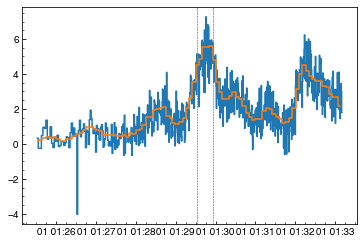

In [39]:
fig, ax = plt.subplots()
ax.plot(new_stix_time_dt, np.sum(new_stix_data[:, erange], axis=1), 
        drawstyle="steps-mid", label="STIX 18-60keV")
ax.plot(fermi_time_dt, np.sum(fermi_data_as_stix[:, erange], axis=1), 
        drawstyle="steps-mid", label="STIX 18-60keV")

plt.axvline(new_stix_time_dt[inds_match[0][0]], color="tab:blue",
            ls="dashed", lw=0.5)
plt.axvline(new_stix_time_dt[inds_match[0][-1]], color="tab:blue",
            ls="dashed", lw=0.5)

plt.axvline(parse_time(fermi_time_egdes[48][0], format="utime").datetime, color="tab:orange", 
            ls="dashed", lw=0.5)
plt.axvline(parse_time(fermi_time_egdes[52][1], format="utime").datetime, color="tab:orange",
            ls="dashed", lw=0.5)

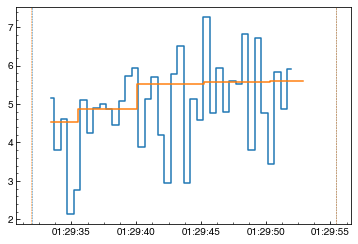

In [40]:
fig, ax = plt.subplots()
ax.plot(new_stix_time_dt[283:321], np.sum(new_stix_data[283:321, erange], axis=1), 
        drawstyle="steps-mid", label="STIX 18-60keV")

# ax.plot(new_stix_time_dt[23:25], np.sum(new_stix_data[23:25, erange], axis=1), 
#         drawstyle="steps-mid", label="STIX 18-60keV")

ax.plot(fermi_time_dt[48:53], np.sum(fermi_data_as_stix[48:53, erange], axis=1), 
        drawstyle="steps-mid", label="STIX 18-60keV")

plt.axvline(new_stix_time_dt[280], color="tab:blue",
            ls="dashed", lw=0.5)
plt.axvline(new_stix_time_dt[327], color="tab:blue",
            ls="dashed", lw=0.5)

# plt.axvline(new_stix_time_dt[22], color="tab:blue",
#             ls="dashed", lw=0.5)
# plt.axvline(new_stix_time_dt[25], color="tab:blue",
#             ls="dashed", lw=0.5)

plt.axvline(parse_time(fermi_time_egdes[48][0], format="utime").datetime, color="tab:orange", 
            ls="dashed", lw=0.5)
plt.axvline(parse_time(fermi_time_egdes[52][1], format="utime").datetime, color="tab:orange",
            ls="dashed", lw=0.5)

In [41]:
fermi_e = np.mean(fermi_data_as_stix[48:53, erange], axis=0)
stix_e = np.mean(new_stix_data[283:321, erange], axis=0)
#stix_e = np.mean(new_stix_data[23:25, erange], axis=0)
stix_e_error = np.sqrt(np.sum((new_stix_err[283:321, erange]/(321-283))**2, axis=0))

<ErrorbarContainer object of 3 artists>

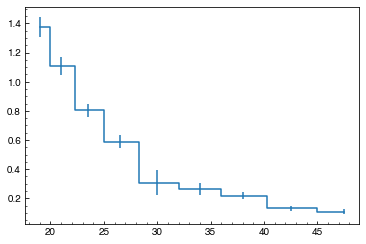

In [42]:
plt.errorbar(stix_ct_energy[erange], stix_e, stix_e_error, drawstyle="steps-mid")

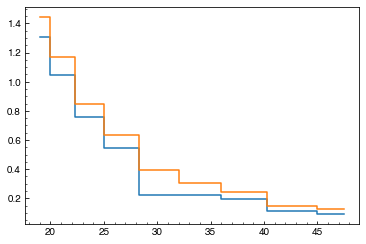

In [43]:
plt.plot(stix_ct_energy[erange], stix_e-stix_e_error, drawstyle="steps-mid")
plt.plot(stix_ct_energy[erange], stix_e+stix_e_error, drawstyle="steps-mid")

In [44]:
ratio_1 = fermi_e/(stix_e-stix_e_error)
ratio_2 = fermi_e/(stix_e+stix_e_error)#/fermi_e
ratio_3 = fermi_e/(stix_e + (2.45/100)*stix_e) # this 2.45 comes from Säm's notes
ratio_3 = (fermi_e)/(stix_e)
ratio_3 = (fermi_e)/(stix_e)

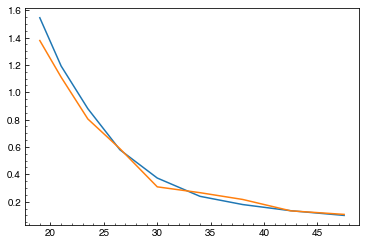

In [45]:
plt.plot(stix_ct_energy[erange], fermi_e)
plt.plot(stix_ct_energy[erange], stix_e)

In [46]:
np.mean(ratio_3)

1.0164142654079333

(0.0, 2.0)

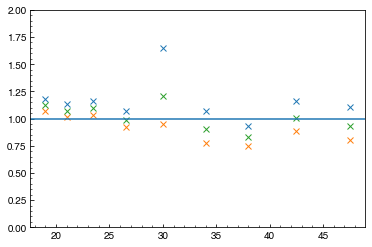

In [47]:
fig, ax = plt.subplots()
ax.plot(stix_ct_energy[erange], ratio_1,  marker='x', ls='')
ax.plot(stix_ct_energy[erange], ratio_2,  marker='x', ls='')
ax.plot(stix_ct_energy[erange], ratio_3,  marker='x', ls='')
ax.axhline(1)
plt.ylim(0, 2)

In [48]:
2.45/100

0.0245

## Try compare resamped data

In [49]:
resampled_stix.shape

(92, 22)

In [50]:
fermi_data_as_stix.shape

(92, 22)

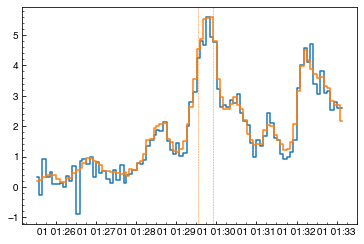

In [51]:
fig, ax = plt.subplots()
ax.plot(fermi_time_dt, np.sum(resampled_stix[:, erange], axis=1), 
        drawstyle="steps-mid", label="STIX 18-60keV")
ax.plot(fermi_time_dt, np.sum(fermi_data_as_stix[:, erange], axis=1), 
        drawstyle="steps-mid", label="STIX 18-60keV")

# plt.axvline(new_stix_time_dt[inds_match[0][0]], color="tab:blue",
#             ls="dashed", lw=0.5)
# plt.axvline(new_stix_time_dt[inds_match[0][-1]], color="tab:blue",
#             ls="dashed", lw=0.5)

plt.axvline(parse_time(fermi_time_egdes[48][0], format="utime").datetime, color="tab:orange", 
            ls="dashed", lw=0.5)
plt.axvline(parse_time(fermi_time_egdes[52][1], format="utime").datetime, color="tab:orange",
            ls="dashed", lw=0.5)

In [52]:
fermi_e = np.mean(fermi_data_as_stix[45:55, erange], axis=0)
stix_e = np.mean(resampled_stix[45:55, erange], axis=0)

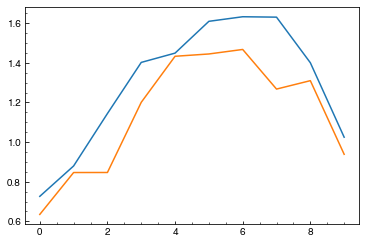

In [53]:
plt.plot(np.sum(fermi_data_as_stix[45:55, erange[0:1]], axis=1))
plt.plot(np.sum(resampled_stix[45:55, erange[0:1]], axis=1))

In [54]:
ratio = fermi_e/stix_e

In [55]:
np.mean(ratio)

1.0156605

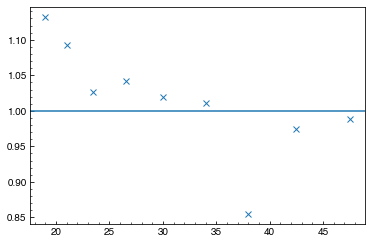

In [56]:
plt.plot(stix_ct_energy[erange], ratio,  marker='x', ls='')
plt.axhline(1)